In [2]:
pip install tqdm

/bin/bash: /home/prikshit/miniconda3/envs/gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 349.6 kB/s eta 0:00:001m327.1 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U scikit-image

/bin/bash: /home/prikshit/miniconda3/envs/gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 3.4 MB/s eta 0:00:004.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


2022-08-02 12:43:17.532315: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
seed = 42
np.random.seed = seed

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [4]:
TRAIN_PATH = 'data-science-bowl-2018/stage1_train/'
TEST_PATH = 'data-science-bowl-2018/stage1_test/'


In [5]:
train_ids = next(os.walk(TRAIN_PATH))[1]


In [6]:
(train_ids)

['da8ca06ccbb4e2a8718f7c2939ef6cc3a4088981f660842ad885a8273e740d55',
 '35ca5f142a7d7a3e4b59f1a767a31f87cb00d66348226bc64094ee3d1e46531c',
 'a3a65623e079af7988b0c1cf1e54041003c6d730c91ecf200b71c47b93a67ed6',
 '8bef203fce625e4d8c89dca728158be4662dfdfdcd4dc73a6aa39a908c1631bc',
 '1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72',
 '4e07a653352b30bb95b60ebc6c57afbc7215716224af731c51ff8d430788cd40',
 '55ff2b0ec48b76e10c7ee18add5794005cd551697f96af865c763d50da78dd9c',
 'ec031f176dafe0b36547068ce42eab39428ec7995dac1b3ea52d1db79b61fdeb',
 '815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a',
 'f93ec5e683d81005ffc2a84a1c0299b2406ad14b764b824e013f7ca3a13833b5',
 '2227fd9b01d67c2bcdb407d3205214e6dfeff9fd0725828e3b3651959942ff4a',
 '077f026f4ab0f0bcc0856644d99cbf639e443ec4f067d7b708bc6cecac609424',
 '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776',
 '1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8',
 '4bf6a5ec42032bb8dbbb10d25fdc5211

In [7]:
len(train_ids)

670

In [8]:
test_ids = next(os.walk(TEST_PATH))[1]

In [9]:

len(test_ids)

65

In [10]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [11]:
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

/tmp/ipykernel_3406/1133275397.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


In [12]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

Resizing training images and masks


  0%|                                                   | 0/670 [00:00<?, ?it/s]/tmp/ipykernel_3406/118592298.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
100%|█████████████████████████████████████████| 670/670 [02:05<00:00,  5.33it/s]


In [13]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img


Resizing test images


100%|███████████████████████████████████████████| 65/65 [00:00<00:00, 88.49it/s]


In [14]:
print(X_train)

[[[[14 14 14]
   [ 9  9  9]
   [ 6  6  6]
   ...
   [ 4  4  4]
   [ 4  4  4]
   [ 3  3  3]]

  [[ 9  9  9]
   [ 7  7  7]
   [ 5  5  5]
   ...
   [ 5  5  5]
   [ 5  5  5]
   [ 5  5  5]]

  [[ 7  7  7]
   [ 5  5  5]
   [ 5  5  5]
   ...
   [ 7  7  7]
   [ 7  7  7]
   [ 6  6  6]]

  ...

  [[10 10 10]
   [11 11 11]
   [13 13 13]
   ...
   [ 5  5  5]
   [ 4  4  4]
   [ 4  4  4]]

  [[12 12 12]
   [14 14 14]
   [15 15 15]
   ...
   [ 4  4  4]
   [ 4  4  4]
   [ 4  4  4]]

  [[11 11 11]
   [12 12 12]
   [14 14 14]
   ...
   [ 4  4  4]
   [ 4  4  4]
   [ 4  4  4]]]


 [[[ 2  2  2]
   [ 3  3  3]
   [ 4  4  4]
   ...
   [ 6  6  6]
   [ 6  6  6]
   [ 5  5  5]]

  [[ 2  2  2]
   [ 3  3  3]
   [ 4  4  4]
   ...
   [ 9  9  9]
   [ 9  9  9]
   [ 8  8  8]]

  [[ 2  2  2]
   [ 3  3  3]
   [ 4  4  4]
   ...
   [12 12 12]
   [15 15 15]
   [14 14 14]]

  ...

  [[36 36 36]
   [42 42 42]
   [43 43 43]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]]

  [[38 38 38]
   [40 40 40]
   [42 42 42]
   ...
   [ 

In [66]:
X_test

array([[[[141, 142, 167],
         [199, 200, 196],
         [213, 212, 194],
         ...,
         [ 82,  51, 128],
         [ 69,  39, 118],
         [ 51,  29, 100]],

        [[182, 184, 186],
         [227, 229, 213],
         [234, 233, 205],
         ...,
         [ 62,  49, 123],
         [ 84,  68, 146],
         [ 85,  82, 137]],

        [[199, 201, 198],
         [235, 237, 220],
         [242, 237, 213],
         ...,
         [150, 146, 193],
         [172, 158, 199],
         [166, 147, 187]],

        ...,

        [[153, 128, 133],
         [135, 105, 172],
         [184, 192, 197],
         ...,
         [233, 233, 205],
         [230, 229, 196],
         [206, 206, 182]],

        [[139, 103, 133],
         [128, 108, 173],
         [189, 197, 190],
         ...,
         [241, 241, 224],
         [239, 239, 219],
         [215, 215, 198]],

        [[108,  71, 128],
         [122, 110, 162],
         [172, 175, 152],
         ...,
         [215, 217, 198],
        

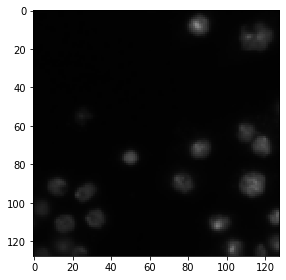

In [15]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()



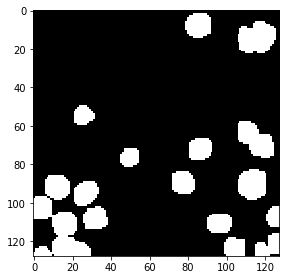

In [16]:
imshow(np.squeeze(Y_train[image_x]))
plt.show()


In [17]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives']
   )
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

 conv2d_15 (Conv2D)             (None, 64, 64, 32)   9248        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
          

2022-08-02 12:46:31.457907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:46:31.471943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:46:31.472039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:46:31.472558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

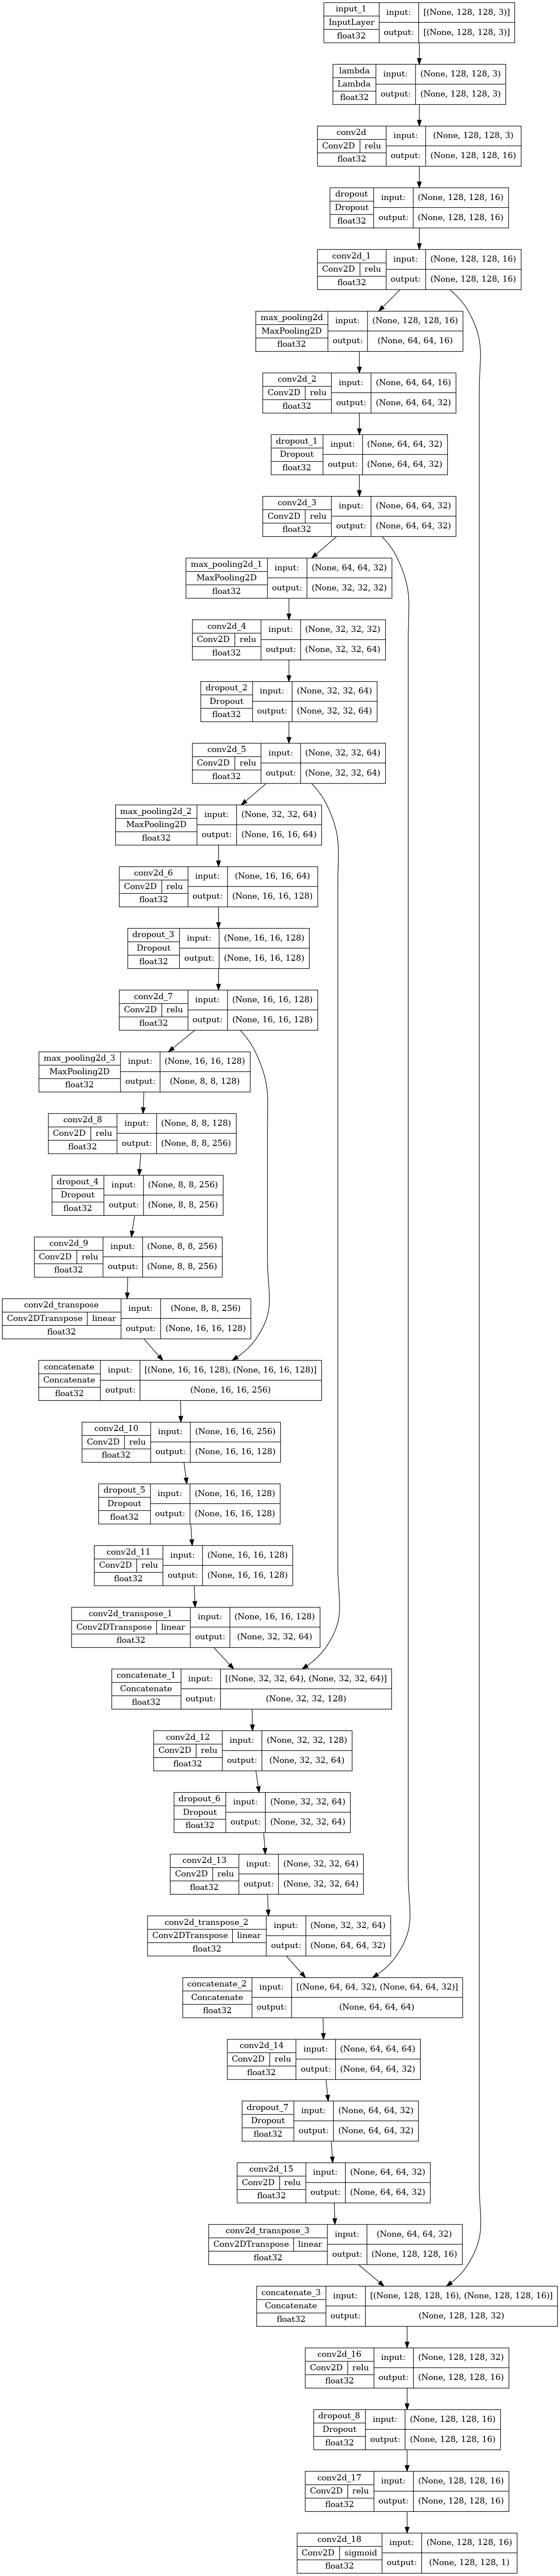

In [19]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='u-net.png',  show_shapes=True,
                          show_dtype=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=96,
                          layer_range=None,
                          show_layer_activations=True)

In [32]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        
        tf.keras.callbacks.TensorBoard(log_dir='logs')]


In [46]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=1000, callbacks=callbacks)

Epoch 1/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0392 - accuracy: 0.9836 - precision: 0.9676 - recall: 0.9661 - auc: 0.9986 - true_positives: 2361076.0000 - true_negatives: 7356534.0000 - false_positives: 79183.0000 - false_negatives: 82759.0000 - val_loss: 0.0943 - val_accuracy: 0.9716 - val_precision: 0.9541 - val_recall: 0.9334 - val_auc: 0.9911 - val_true_positives: 261221.0000 - val_true_negatives: 805300.0000 - val_false_positives: 12567.0000 - val_false_negatives: 18640.0000
Epoch 2/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0378 - accuracy: 0.9842 - precision: 0.9686 - recall: 0.9677 - auc: 0.9987 - true_positives: 2364888.0000 - true_negatives: 7358943.0000 - false_positives: 76774.0000 - false_negatives: 78947.0000 - val_loss: 0.0950 - val_accuracy: 0.9719 - val_precision: 0.9460 - val_recall: 0.9437 - val_auc: 0.9912 - val_true_positives: 264115.0000 - val_true_negatives: 802781.0000 - val_false_positives: 15086.0000 - va

Epoch 17/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0364 - accuracy: 0.9848 - precision: 0.9697 - recall: 0.9688 - auc: 0.9988 - true_positives: 2367571.0000 - true_negatives: 7361830.0000 - false_positives: 73887.0000 - false_negatives: 76264.0000 - val_loss: 0.0985 - val_accuracy: 0.9718 - val_precision: 0.9442 - val_recall: 0.9453 - val_auc: 0.9906 - val_true_positives: 264547.0000 - val_true_negatives: 802221.0000 - val_false_positives: 15646.0000 - val_false_negatives: 15314.0000
Epoch 18/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0355 - accuracy: 0.9853 - precision: 0.9705 - recall: 0.9699 - auc: 0.9988 - true_positives: 2370219.0000 - true_negatives: 7363611.0000 - false_positives: 72106.0000 - false_negatives: 73616.0000 - val_loss: 0.0846 - val_accuracy: 0.9737 - val_precision: 0.9560 - val_recall: 0.9400 - val_auc: 0.9928 - val_true_positives: 263064.0000 - val_true_negatives: 805758.0000 - val_false_positives: 12109.0000 - 

Epoch 33/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0342 - accuracy: 0.9858 - precision: 0.9715 - recall: 0.9712 - auc: 0.9989 - true_positives: 2373451.0000 - true_negatives: 7366000.0000 - false_positives: 69717.0000 - false_negatives: 70384.0000 - val_loss: 0.1137 - val_accuracy: 0.9723 - val_precision: 0.9549 - val_recall: 0.9356 - val_auc: 0.9889 - val_true_positives: 261851.0000 - val_true_negatives: 805489.0000 - val_false_positives: 12378.0000 - val_false_negatives: 18010.0000
Epoch 34/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0330 - accuracy: 0.9863 - precision: 0.9723 - recall: 0.9721 - auc: 0.9990 - true_positives: 2375727.0000 - true_negatives: 7368001.0000 - false_positives: 67716.0000 - false_negatives: 68108.0000 - val_loss: 0.0936 - val_accuracy: 0.9738 - val_precision: 0.9569 - val_recall: 0.9394 - val_auc: 0.9912 - val_true_positives: 262889.0000 - val_true_negatives: 806024.0000 - val_false_positives: 11843.0000 - 

Epoch 49/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0302 - accuracy: 0.9874 - precision: 0.9746 - recall: 0.9747 - auc: 0.9991 - true_positives: 2381900.0000 - true_negatives: 7373537.0000 - false_positives: 62180.0000 - false_negatives: 61935.0000 - val_loss: 0.1117 - val_accuracy: 0.9726 - val_precision: 0.9541 - val_recall: 0.9377 - val_auc: 0.9894 - val_true_positives: 262422.0000 - val_true_negatives: 805233.0000 - val_false_positives: 12634.0000 - val_false_negatives: 17439.0000
Epoch 50/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0301 - accuracy: 0.9875 - precision: 0.9746 - recall: 0.9748 - auc: 0.9991 - true_positives: 2382135.0000 - true_negatives: 7373538.0000 - false_positives: 62179.0000 - false_negatives: 61700.0000 - val_loss: 0.1061 - val_accuracy: 0.9729 - val_precision: 0.9558 - val_recall: 0.9370 - val_auc: 0.9897 - val_true_positives: 262217.0000 - val_true_negatives: 805745.0000 - val_false_positives: 12122.0000 - 

Epoch 65/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0293 - accuracy: 0.9878 - precision: 0.9751 - recall: 0.9753 - auc: 0.9992 - true_positives: 2383590.0000 - true_negatives: 7374955.0000 - false_positives: 60762.0000 - false_negatives: 60245.0000 - val_loss: 0.1001 - val_accuracy: 0.9735 - val_precision: 0.9533 - val_recall: 0.9422 - val_auc: 0.9906 - val_true_positives: 263680.0000 - val_true_negatives: 804943.0000 - val_false_positives: 12924.0000 - val_false_negatives: 16181.0000
Epoch 66/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0289 - accuracy: 0.9880 - precision: 0.9757 - recall: 0.9757 - auc: 0.9992 - true_positives: 2384391.0000 - true_negatives: 7376452.0000 - false_positives: 59265.0000 - false_negatives: 59444.0000 - val_loss: 0.1029 - val_accuracy: 0.9737 - val_precision: 0.9509 - val_recall: 0.9456 - val_auc: 0.9903 - val_true_positives: 264640.0000 - val_true_negatives: 804215.0000 - val_false_positives: 13652.0000 - 

Epoch 81/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0275 - accuracy: 0.9886 - precision: 0.9768 - recall: 0.9770 - auc: 0.9993 - true_positives: 2387507.0000 - true_negatives: 7379122.0000 - false_positives: 56595.0000 - false_negatives: 56328.0000 - val_loss: 0.1026 - val_accuracy: 0.9736 - val_precision: 0.9501 - val_recall: 0.9459 - val_auc: 0.9906 - val_true_positives: 264723.0000 - val_true_negatives: 803978.0000 - val_false_positives: 13889.0000 - val_false_negatives: 15138.0000
Epoch 82/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0275 - accuracy: 0.9886 - precision: 0.9767 - recall: 0.9771 - auc: 0.9993 - true_positives: 2387986.0000 - true_negatives: 7378771.0000 - false_positives: 56946.0000 - false_negatives: 55849.0000 - val_loss: 0.1038 - val_accuracy: 0.9738 - val_precision: 0.9535 - val_recall: 0.9431 - val_auc: 0.9899 - val_true_positives: 263948.0000 - val_true_negatives: 804988.0000 - val_false_positives: 12879.0000 - 

Epoch 97/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0287 - accuracy: 0.9881 - precision: 0.9758 - recall: 0.9761 - auc: 0.9992 - true_positives: 2385545.0000 - true_negatives: 7376484.0000 - false_positives: 59233.0000 - false_negatives: 58290.0000 - val_loss: 0.0964 - val_accuracy: 0.9743 - val_precision: 0.9524 - val_recall: 0.9466 - val_auc: 0.9911 - val_true_positives: 264930.0000 - val_true_negatives: 804637.0000 - val_false_positives: 13230.0000 - val_false_negatives: 14931.0000
Epoch 98/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0283 - accuracy: 0.9882 - precision: 0.9758 - recall: 0.9765 - auc: 0.9992 - true_positives: 2386475.0000 - true_negatives: 7376621.0000 - false_positives: 59096.0000 - false_negatives: 57360.0000 - val_loss: 0.0950 - val_accuracy: 0.9747 - val_precision: 0.9572 - val_recall: 0.9428 - val_auc: 0.9912 - val_true_positives: 263847.0000 - val_true_negatives: 806076.0000 - val_false_positives: 11791.0000 - 

Epoch 113/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0258 - accuracy: 0.9893 - precision: 0.9782 - recall: 0.9785 - auc: 0.9994 - true_positives: 2391197.0000 - true_negatives: 7382319.0000 - false_positives: 53398.0000 - false_negatives: 52638.0000 - val_loss: 0.1006 - val_accuracy: 0.9746 - val_precision: 0.9516 - val_recall: 0.9486 - val_auc: 0.9908 - val_true_positives: 265478.0000 - val_true_negatives: 804359.0000 - val_false_positives: 13508.0000 - val_false_negatives: 14383.0000
Epoch 114/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0257 - accuracy: 0.9893 - precision: 0.9780 - recall: 0.9788 - auc: 0.9994 - true_positives: 2392130.0000 - true_negatives: 7381956.0000 - false_positives: 53761.0000 - false_negatives: 51705.0000 - val_loss: 0.0984 - val_accuracy: 0.9749 - val_precision: 0.9554 - val_recall: 0.9458 - val_auc: 0.9908 - val_true_positives: 264699.0000 - val_true_negatives: 805520.0000 - val_false_positives: 12347.0000 

Epoch 129/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0252 - accuracy: 0.9896 - precision: 0.9786 - recall: 0.9791 - auc: 0.9994 - true_positives: 2392874.0000 - true_negatives: 7383498.0000 - false_positives: 52219.0000 - false_negatives: 50961.0000 - val_loss: 0.0969 - val_accuracy: 0.9752 - val_precision: 0.9527 - val_recall: 0.9500 - val_auc: 0.9913 - val_true_positives: 265857.0000 - val_true_negatives: 804666.0000 - val_false_positives: 13201.0000 - val_false_negatives: 14004.0000
Epoch 130/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0252 - accuracy: 0.9896 - precision: 0.9786 - recall: 0.9792 - auc: 0.9994 - true_positives: 2393015.0000 - true_negatives: 7383384.0000 - false_positives: 52333.0000 - false_negatives: 50820.0000 - val_loss: 0.1010 - val_accuracy: 0.9745 - val_precision: 0.9517 - val_recall: 0.9483 - val_auc: 0.9909 - val_true_positives: 265381.0000 - val_true_negatives: 804408.0000 - val_false_positives: 13459.0000 

Epoch 145/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0241 - accuracy: 0.9900 - precision: 0.9796 - recall: 0.9799 - auc: 0.9994 - true_positives: 2394832.0000 - true_negatives: 7385818.0000 - false_positives: 49899.0000 - false_negatives: 49003.0000 - val_loss: 0.1002 - val_accuracy: 0.9753 - val_precision: 0.9546 - val_recall: 0.9483 - val_auc: 0.9907 - val_true_positives: 265399.0000 - val_true_negatives: 805253.0000 - val_false_positives: 12614.0000 - val_false_negatives: 14462.0000
Epoch 146/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0238 - accuracy: 0.9902 - precision: 0.9795 - recall: 0.9807 - auc: 0.9995 - true_positives: 2396758.0000 - true_negatives: 7385526.0000 - false_positives: 50191.0000 - false_negatives: 47077.0000 - val_loss: 0.1074 - val_accuracy: 0.9749 - val_precision: 0.9609 - val_recall: 0.9399 - val_auc: 0.9893 - val_true_positives: 263032.0000 - val_true_negatives: 807154.0000 - val_false_positives: 10713.0000 

Epoch 161/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0235 - accuracy: 0.9903 - precision: 0.9801 - recall: 0.9807 - auc: 0.9995 - true_positives: 2396736.0000 - true_negatives: 7386932.0000 - false_positives: 48785.0000 - false_negatives: 47099.0000 - val_loss: 0.1061 - val_accuracy: 0.9750 - val_precision: 0.9531 - val_recall: 0.9485 - val_auc: 0.9900 - val_true_positives: 265435.0000 - val_true_negatives: 804808.0000 - val_false_positives: 13059.0000 - val_false_negatives: 14426.0000
Epoch 162/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0229 - accuracy: 0.9905 - precision: 0.9803 - recall: 0.9814 - auc: 0.9995 - true_positives: 2398330.0000 - true_negatives: 7387577.0000 - false_positives: 48140.0000 - false_negatives: 45505.0000 - val_loss: 0.1091 - val_accuracy: 0.9749 - val_precision: 0.9561 - val_recall: 0.9449 - val_auc: 0.9893 - val_true_positives: 264441.0000 - val_true_negatives: 805720.0000 - val_false_positives: 12147.0000 

Epoch 177/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0235 - accuracy: 0.9903 - precision: 0.9799 - recall: 0.9807 - auc: 0.9995 - true_positives: 2396670.0000 - true_negatives: 7386647.0000 - false_positives: 49070.0000 - false_negatives: 47165.0000 - val_loss: 0.1052 - val_accuracy: 0.9743 - val_precision: 0.9546 - val_recall: 0.9443 - val_auc: 0.9898 - val_true_positives: 264285.0000 - val_true_negatives: 805285.0000 - val_false_positives: 12582.0000 - val_false_negatives: 15576.0000
Epoch 178/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0235 - accuracy: 0.9903 - precision: 0.9799 - recall: 0.9807 - auc: 0.9995 - true_positives: 2396711.0000 - true_negatives: 7386584.0000 - false_positives: 49133.0000 - false_negatives: 47124.0000 - val_loss: 0.1083 - val_accuracy: 0.9741 - val_precision: 0.9540 - val_recall: 0.9438 - val_auc: 0.9895 - val_true_positives: 264123.0000 - val_true_negatives: 805124.0000 - val_false_positives: 12743.0000 

Epoch 193/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0221 - accuracy: 0.9908 - precision: 0.9811 - recall: 0.9819 - auc: 0.9995 - true_positives: 2399551.0000 - true_negatives: 7389592.0000 - false_positives: 46125.0000 - false_negatives: 44284.0000 - val_loss: 0.1057 - val_accuracy: 0.9751 - val_precision: 0.9547 - val_recall: 0.9472 - val_auc: 0.9900 - val_true_positives: 265077.0000 - val_true_negatives: 805275.0000 - val_false_positives: 12592.0000 - val_false_negatives: 14784.0000
Epoch 194/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0220 - accuracy: 0.9909 - precision: 0.9812 - recall: 0.9820 - auc: 0.9995 - true_positives: 2399784.0000 - true_negatives: 7389664.0000 - false_positives: 46053.0000 - false_negatives: 44051.0000 - val_loss: 0.1105 - val_accuracy: 0.9753 - val_precision: 0.9574 - val_recall: 0.9453 - val_auc: 0.9892 - val_true_positives: 264562.0000 - val_true_negatives: 806090.0000 - val_false_positives: 11777.0000 

Epoch 209/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0214 - accuracy: 0.9911 - precision: 0.9816 - recall: 0.9825 - auc: 0.9995 - true_positives: 2401097.0000 - true_negatives: 7390756.0000 - false_positives: 44961.0000 - false_negatives: 42738.0000 - val_loss: 0.1260 - val_accuracy: 0.9735 - val_precision: 0.9535 - val_recall: 0.9421 - val_auc: 0.9873 - val_true_positives: 263651.0000 - val_true_negatives: 805022.0000 - val_false_positives: 12845.0000 - val_false_negatives: 16210.0000
Epoch 210/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0219 - accuracy: 0.9909 - precision: 0.9812 - recall: 0.9821 - auc: 0.9995 - true_positives: 2400175.0000 - true_negatives: 7389784.0000 - false_positives: 45933.0000 - false_negatives: 43660.0000 - val_loss: 0.1099 - val_accuracy: 0.9745 - val_precision: 0.9543 - val_recall: 0.9451 - val_auc: 0.9893 - val_true_positives: 264493.0000 - val_true_negatives: 805189.0000 - val_false_positives: 12678.0000 

Epoch 225/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0221 - accuracy: 0.9909 - precision: 0.9814 - recall: 0.9818 - auc: 0.9995 - true_positives: 2399237.0000 - true_negatives: 7390275.0000 - false_positives: 45442.0000 - false_negatives: 44598.0000 - val_loss: 0.1109 - val_accuracy: 0.9745 - val_precision: 0.9531 - val_recall: 0.9464 - val_auc: 0.9892 - val_true_positives: 264860.0000 - val_true_negatives: 804835.0000 - val_false_positives: 13032.0000 - val_false_negatives: 15001.0000
Epoch 226/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0237 - accuracy: 0.9903 - precision: 0.9802 - recall: 0.9806 - auc: 0.9994 - true_positives: 2396424.0000 - true_negatives: 7387203.0000 - false_positives: 48514.0000 - false_negatives: 47411.0000 - val_loss: 0.1041 - val_accuracy: 0.9735 - val_precision: 0.9480 - val_recall: 0.9483 - val_auc: 0.9908 - val_true_positives: 265384.0000 - val_true_negatives: 803303.0000 - val_false_positives: 14564.0000 

Epoch 241/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0204 - accuracy: 0.9916 - precision: 0.9825 - recall: 0.9835 - auc: 0.9996 - true_positives: 2403509.0000 - true_negatives: 7392922.0000 - false_positives: 42795.0000 - false_negatives: 40326.0000 - val_loss: 0.1194 - val_accuracy: 0.9748 - val_precision: 0.9577 - val_recall: 0.9427 - val_auc: 0.9878 - val_true_positives: 263821.0000 - val_true_negatives: 806211.0000 - val_false_positives: 11656.0000 - val_false_negatives: 16040.0000
Epoch 242/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0202 - accuracy: 0.9917 - precision: 0.9827 - recall: 0.9836 - auc: 0.9996 - true_positives: 2403744.0000 - true_negatives: 7393483.0000 - false_positives: 42234.0000 - false_negatives: 40091.0000 - val_loss: 0.1248 - val_accuracy: 0.9742 - val_precision: 0.9559 - val_recall: 0.9421 - val_auc: 0.9871 - val_true_positives: 263666.0000 - val_true_negatives: 805699.0000 - val_false_positives: 12168.0000 

Epoch 257/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0221 - accuracy: 0.9908 - precision: 0.9810 - recall: 0.9820 - auc: 0.9995 - true_positives: 2399880.0000 - true_negatives: 7389253.0000 - false_positives: 46464.0000 - false_negatives: 43955.0000 - val_loss: 0.1083 - val_accuracy: 0.9748 - val_precision: 0.9576 - val_recall: 0.9427 - val_auc: 0.9890 - val_true_positives: 263827.0000 - val_true_negatives: 806189.0000 - val_false_positives: 11678.0000 - val_false_negatives: 16034.0000
Epoch 258/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0218 - accuracy: 0.9910 - precision: 0.9815 - recall: 0.9822 - auc: 0.9995 - true_positives: 2400281.0000 - true_negatives: 7390363.0000 - false_positives: 45354.0000 - false_negatives: 43554.0000 - val_loss: 0.1068 - val_accuracy: 0.9749 - val_precision: 0.9557 - val_recall: 0.9454 - val_auc: 0.9893 - val_true_positives: 264576.0000 - val_true_negatives: 805602.0000 - val_false_positives: 12265.0000 

Epoch 273/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0201 - accuracy: 0.9917 - precision: 0.9828 - recall: 0.9836 - auc: 0.9996 - true_positives: 2403877.0000 - true_negatives: 7393743.0000 - false_positives: 41974.0000 - false_negatives: 39958.0000 - val_loss: 0.1150 - val_accuracy: 0.9750 - val_precision: 0.9537 - val_recall: 0.9481 - val_auc: 0.9889 - val_true_positives: 265326.0000 - val_true_negatives: 804995.0000 - val_false_positives: 12872.0000 - val_false_negatives: 14535.0000
Epoch 274/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0202 - accuracy: 0.9917 - precision: 0.9825 - recall: 0.9838 - auc: 0.9996 - true_positives: 2404300.0000 - true_negatives: 7392897.0000 - false_positives: 42820.0000 - false_negatives: 39535.0000 - val_loss: 0.1157 - val_accuracy: 0.9744 - val_precision: 0.9545 - val_recall: 0.9445 - val_auc: 0.9882 - val_true_positives: 264340.0000 - val_true_negatives: 805276.0000 - val_false_positives: 12591.0000 

Epoch 289/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0191 - accuracy: 0.9922 - precision: 0.9836 - recall: 0.9847 - auc: 0.9996 - true_positives: 2406497.0000 - true_negatives: 7395692.0000 - false_positives: 40025.0000 - false_negatives: 37338.0000 - val_loss: 0.1283 - val_accuracy: 0.9745 - val_precision: 0.9588 - val_recall: 0.9402 - val_auc: 0.9866 - val_true_positives: 263122.0000 - val_true_negatives: 806565.0000 - val_false_positives: 11302.0000 - val_false_negatives: 16739.0000
Epoch 290/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0192 - accuracy: 0.9921 - precision: 0.9836 - recall: 0.9844 - auc: 0.9996 - true_positives: 2405830.0000 - true_negatives: 7395518.0000 - false_positives: 40199.0000 - false_negatives: 38005.0000 - val_loss: 0.1163 - val_accuracy: 0.9750 - val_precision: 0.9518 - val_recall: 0.9502 - val_auc: 0.9890 - val_true_positives: 265916.0000 - val_true_negatives: 804388.0000 - val_false_positives: 13479.0000 

Epoch 305/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0200 - accuracy: 0.9918 - precision: 0.9825 - recall: 0.9842 - auc: 0.9996 - true_positives: 2405344.0000 - true_negatives: 7392841.0000 - false_positives: 42876.0000 - false_negatives: 38491.0000 - val_loss: 0.1203 - val_accuracy: 0.9749 - val_precision: 0.9599 - val_recall: 0.9408 - val_auc: 0.9877 - val_true_positives: 263292.0000 - val_true_negatives: 806873.0000 - val_false_positives: 10994.0000 - val_false_negatives: 16569.0000
Epoch 306/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0197 - accuracy: 0.9919 - precision: 0.9834 - recall: 0.9837 - auc: 0.9996 - true_positives: 2404111.0000 - true_negatives: 7395194.0000 - false_positives: 40523.0000 - false_negatives: 39724.0000 - val_loss: 0.1166 - val_accuracy: 0.9751 - val_precision: 0.9522 - val_recall: 0.9501 - val_auc: 0.9889 - val_true_positives: 265908.0000 - val_true_negatives: 804515.0000 - val_false_positives: 13352.0000 

Epoch 321/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0190 - accuracy: 0.9922 - precision: 0.9836 - recall: 0.9848 - auc: 0.9996 - true_positives: 2406681.0000 - true_negatives: 7395582.0000 - false_positives: 40135.0000 - false_negatives: 37154.0000 - val_loss: 0.1222 - val_accuracy: 0.9750 - val_precision: 0.9561 - val_recall: 0.9452 - val_auc: 0.9877 - val_true_positives: 264517.0000 - val_true_negatives: 805727.0000 - val_false_positives: 12140.0000 - val_false_negatives: 15344.0000
Epoch 322/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0187 - accuracy: 0.9923 - precision: 0.9839 - recall: 0.9849 - auc: 0.9996 - true_positives: 2406996.0000 - true_negatives: 7396382.0000 - false_positives: 39335.0000 - false_negatives: 36839.0000 - val_loss: 0.1244 - val_accuracy: 0.9748 - val_precision: 0.9567 - val_recall: 0.9439 - val_auc: 0.9873 - val_true_positives: 264157.0000 - val_true_negatives: 805901.0000 - val_false_positives: 11966.0000 

Epoch 337/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0185 - accuracy: 0.9924 - precision: 0.9843 - recall: 0.9850 - auc: 0.9996 - true_positives: 2407191.0000 - true_negatives: 7397289.0000 - false_positives: 38428.0000 - false_negatives: 36644.0000 - val_loss: 0.1237 - val_accuracy: 0.9747 - val_precision: 0.9528 - val_recall: 0.9477 - val_auc: 0.9875 - val_true_positives: 265222.0000 - val_true_negatives: 804738.0000 - val_false_positives: 13129.0000 - val_false_negatives: 14639.0000
Epoch 338/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0200 - accuracy: 0.9917 - precision: 0.9830 - recall: 0.9836 - auc: 0.9996 - true_positives: 2403790.0000 - true_negatives: 7394130.0000 - false_positives: 41587.0000 - false_negatives: 40045.0000 - val_loss: 0.1155 - val_accuracy: 0.9752 - val_precision: 0.9533 - val_recall: 0.9491 - val_auc: 0.9886 - val_true_positives: 265615.0000 - val_true_negatives: 804842.0000 - val_false_positives: 13025.0000 

Epoch 353/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0202 - accuracy: 0.9917 - precision: 0.9828 - recall: 0.9837 - auc: 0.9996 - true_positives: 2404122.0000 - true_negatives: 7393596.0000 - false_positives: 42121.0000 - false_negatives: 39713.0000 - val_loss: 0.1126 - val_accuracy: 0.9753 - val_precision: 0.9538 - val_recall: 0.9489 - val_auc: 0.9890 - val_true_positives: 265565.0000 - val_true_negatives: 805003.0000 - val_false_positives: 12864.0000 - val_false_negatives: 14296.0000
Epoch 354/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0192 - accuracy: 0.9921 - precision: 0.9834 - recall: 0.9847 - auc: 0.9996 - true_positives: 2406369.0000 - true_negatives: 7395195.0000 - false_positives: 40522.0000 - false_negatives: 37466.0000 - val_loss: 0.1139 - val_accuracy: 0.9758 - val_precision: 0.9599 - val_recall: 0.9445 - val_auc: 0.9883 - val_true_positives: 264337.0000 - val_true_negatives: 806826.0000 - val_false_positives: 11041.0000 

Epoch 369/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0183 - accuracy: 0.9925 - precision: 0.9842 - recall: 0.9854 - auc: 0.9996 - true_positives: 2408103.0000 - true_negatives: 7397166.0000 - false_positives: 38551.0000 - false_negatives: 35732.0000 - val_loss: 0.1182 - val_accuracy: 0.9755 - val_precision: 0.9609 - val_recall: 0.9423 - val_auc: 0.9877 - val_true_positives: 263701.0000 - val_true_negatives: 807145.0000 - val_false_positives: 10722.0000 - val_false_negatives: 16160.0000
Epoch 370/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0179 - accuracy: 0.9926 - precision: 0.9844 - recall: 0.9858 - auc: 0.9997 - true_positives: 2409093.0000 - true_negatives: 7397603.0000 - false_positives: 38114.0000 - false_negatives: 34742.0000 - val_loss: 0.1209 - val_accuracy: 0.9757 - val_precision: 0.9567 - val_recall: 0.9473 - val_auc: 0.9879 - val_true_positives: 265125.0000 - val_true_negatives: 805874.0000 - val_false_positives: 11993.0000 

Epoch 385/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0185 - accuracy: 0.9924 - precision: 0.9840 - recall: 0.9854 - auc: 0.9996 - true_positives: 2408255.0000 - true_negatives: 7396458.0000 - false_positives: 39259.0000 - false_negatives: 35580.0000 - val_loss: 0.1288 - val_accuracy: 0.9749 - val_precision: 0.9605 - val_recall: 0.9402 - val_auc: 0.9862 - val_true_positives: 263128.0000 - val_true_negatives: 807055.0000 - val_false_positives: 10812.0000 - val_false_negatives: 16733.0000
Epoch 386/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0186 - accuracy: 0.9923 - precision: 0.9841 - recall: 0.9850 - auc: 0.9996 - true_positives: 2407229.0000 - true_negatives: 7396701.0000 - false_positives: 39016.0000 - false_negatives: 36606.0000 - val_loss: 0.1294 - val_accuracy: 0.9742 - val_precision: 0.9588 - val_recall: 0.9393 - val_auc: 0.9865 - val_true_positives: 262874.0000 - val_true_negatives: 806578.0000 - val_false_positives: 11289.0000 

Epoch 401/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0175 - accuracy: 0.9928 - precision: 0.9848 - recall: 0.9862 - auc: 0.9997 - true_positives: 2410049.0000 - true_negatives: 7398594.0000 - false_positives: 37123.0000 - false_negatives: 33786.0000 - val_loss: 0.1478 - val_accuracy: 0.9744 - val_precision: 0.9586 - val_recall: 0.9402 - val_auc: 0.9858 - val_true_positives: 263112.0000 - val_true_negatives: 806494.0000 - val_false_positives: 11373.0000 - val_false_negatives: 16749.0000
Epoch 402/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0176 - accuracy: 0.9928 - precision: 0.9850 - recall: 0.9859 - auc: 0.9997 - true_positives: 2409315.0000 - true_negatives: 7399140.0000 - false_positives: 36577.0000 - false_negatives: 34520.0000 - val_loss: 0.1634 - val_accuracy: 0.9742 - val_precision: 0.9569 - val_recall: 0.9413 - val_auc: 0.9849 - val_true_positives: 263430.0000 - val_true_negatives: 805989.0000 - val_false_positives: 11878.0000 

Epoch 417/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0174 - accuracy: 0.9929 - precision: 0.9849 - recall: 0.9863 - auc: 0.9997 - true_positives: 2410362.0000 - true_negatives: 7398686.0000 - false_positives: 37031.0000 - false_negatives: 33473.0000 - val_loss: 0.1529 - val_accuracy: 0.9740 - val_precision: 0.9600 - val_recall: 0.9371 - val_auc: 0.9844 - val_true_positives: 262250.0000 - val_true_negatives: 806943.0000 - val_false_positives: 10924.0000 - val_false_negatives: 17611.0000
Epoch 418/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0175 - accuracy: 0.9928 - precision: 0.9851 - recall: 0.9859 - auc: 0.9997 - true_positives: 2409258.0000 - true_negatives: 7399219.0000 - false_positives: 36498.0000 - false_negatives: 34577.0000 - val_loss: 0.1575 - val_accuracy: 0.9737 - val_precision: 0.9547 - val_recall: 0.9414 - val_auc: 0.9845 - val_true_positives: 263474.0000 - val_true_negatives: 805352.0000 - val_false_positives: 12515.0000 

Epoch 433/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0179 - accuracy: 0.9927 - precision: 0.9846 - recall: 0.9857 - auc: 0.9997 - true_positives: 2408941.0000 - true_negatives: 7398159.0000 - false_positives: 37558.0000 - false_negatives: 34894.0000 - val_loss: 0.1381 - val_accuracy: 0.9742 - val_precision: 0.9596 - val_recall: 0.9384 - val_auc: 0.9856 - val_true_positives: 262613.0000 - val_true_negatives: 806810.0000 - val_false_positives: 11057.0000 - val_false_negatives: 17248.0000
Epoch 434/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0181 - accuracy: 0.9926 - precision: 0.9844 - recall: 0.9855 - auc: 0.9996 - true_positives: 2408514.0000 - true_negatives: 7397520.0000 - false_positives: 38197.0000 - false_negatives: 35321.0000 - val_loss: 0.1370 - val_accuracy: 0.9740 - val_precision: 0.9554 - val_recall: 0.9419 - val_auc: 0.9860 - val_true_positives: 263597.0000 - val_true_negatives: 805565.0000 - val_false_positives: 12302.0000 

Epoch 449/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0171 - accuracy: 0.9930 - precision: 0.9853 - recall: 0.9864 - auc: 0.9997 - true_positives: 2410714.0000 - true_negatives: 7399781.0000 - false_positives: 35936.0000 - false_negatives: 33121.0000 - val_loss: 0.1480 - val_accuracy: 0.9743 - val_precision: 0.9627 - val_recall: 0.9354 - val_auc: 0.9846 - val_true_positives: 261791.0000 - val_true_negatives: 807722.0000 - val_false_positives: 10145.0000 - val_false_negatives: 18070.0000
Epoch 450/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0175 - accuracy: 0.9928 - precision: 0.9849 - recall: 0.9859 - auc: 0.9997 - true_positives: 2409386.0000 - true_negatives: 7398882.0000 - false_positives: 36835.0000 - false_negatives: 34449.0000 - val_loss: 0.1321 - val_accuracy: 0.9744 - val_precision: 0.9554 - val_recall: 0.9438 - val_auc: 0.9866 - val_true_positives: 264136.0000 - val_true_negatives: 805523.0000 - val_false_positives: 12344.0000 

Epoch 465/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0164 - accuracy: 0.9933 - precision: 0.9859 - recall: 0.9869 - auc: 0.9997 - true_positives: 2411928.0000 - true_negatives: 7401215.0000 - false_positives: 34502.0000 - false_negatives: 31907.0000 - val_loss: 0.1425 - val_accuracy: 0.9746 - val_precision: 0.9608 - val_recall: 0.9387 - val_auc: 0.9850 - val_true_positives: 262693.0000 - val_true_negatives: 807136.0000 - val_false_positives: 10731.0000 - val_false_negatives: 17168.0000
Epoch 466/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0167 - accuracy: 0.9931 - precision: 0.9856 - recall: 0.9866 - auc: 0.9997 - true_positives: 2411116.0000 - true_negatives: 7400449.0000 - false_positives: 35268.0000 - false_negatives: 32719.0000 - val_loss: 0.1390 - val_accuracy: 0.9746 - val_precision: 0.9555 - val_recall: 0.9442 - val_auc: 0.9857 - val_true_positives: 264234.0000 - val_true_negatives: 805559.0000 - val_false_positives: 12308.0000 

Epoch 481/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0163 - accuracy: 0.9933 - precision: 0.9860 - recall: 0.9871 - auc: 0.9997 - true_positives: 2412371.0000 - true_negatives: 7401343.0000 - false_positives: 34374.0000 - false_negatives: 31464.0000 - val_loss: 0.1513 - val_accuracy: 0.9745 - val_precision: 0.9558 - val_recall: 0.9435 - val_auc: 0.9847 - val_true_positives: 264039.0000 - val_true_negatives: 805656.0000 - val_false_positives: 12211.0000 - val_false_negatives: 15822.0000
Epoch 482/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0162 - accuracy: 0.9934 - precision: 0.9859 - recall: 0.9872 - auc: 0.9997 - true_positives: 2412605.0000 - true_negatives: 7401261.0000 - false_positives: 34456.0000 - false_negatives: 31230.0000 - val_loss: 0.1394 - val_accuracy: 0.9748 - val_precision: 0.9574 - val_recall: 0.9431 - val_auc: 0.9855 - val_true_positives: 263929.0000 - val_true_negatives: 806119.0000 - val_false_positives: 11748.0000 

Epoch 497/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0162 - accuracy: 0.9934 - precision: 0.9860 - recall: 0.9872 - auc: 0.9997 - true_positives: 2412477.0000 - true_negatives: 7401453.0000 - false_positives: 34264.0000 - false_negatives: 31358.0000 - val_loss: 0.1302 - val_accuracy: 0.9756 - val_precision: 0.9594 - val_recall: 0.9441 - val_auc: 0.9866 - val_true_positives: 264229.0000 - val_true_negatives: 806693.0000 - val_false_positives: 11174.0000 - val_false_negatives: 15632.0000
Epoch 498/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0169 - accuracy: 0.9931 - precision: 0.9855 - recall: 0.9866 - auc: 0.9997 - true_positives: 2411003.0000 - true_negatives: 7400315.0000 - false_positives: 35402.0000 - false_negatives: 32832.0000 - val_loss: 0.1391 - val_accuracy: 0.9742 - val_precision: 0.9556 - val_recall: 0.9427 - val_auc: 0.9855 - val_true_positives: 263835.0000 - val_true_negatives: 805608.0000 - val_false_positives: 12259.0000 

Epoch 513/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0160 - accuracy: 0.9935 - precision: 0.9864 - recall: 0.9874 - auc: 0.9997 - true_positives: 2412935.0000 - true_negatives: 7402413.0000 - false_positives: 33304.0000 - false_negatives: 30900.0000 - val_loss: 0.1335 - val_accuracy: 0.9749 - val_precision: 0.9541 - val_recall: 0.9472 - val_auc: 0.9866 - val_true_positives: 265085.0000 - val_true_negatives: 805107.0000 - val_false_positives: 12760.0000 - val_false_negatives: 14776.0000
Epoch 514/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0165 - accuracy: 0.9933 - precision: 0.9858 - recall: 0.9869 - auc: 0.9997 - true_positives: 2411857.0000 - true_negatives: 7401077.0000 - false_positives: 34640.0000 - false_negatives: 31978.0000 - val_loss: 0.1470 - val_accuracy: 0.9744 - val_precision: 0.9576 - val_recall: 0.9413 - val_auc: 0.9848 - val_true_positives: 263446.0000 - val_true_negatives: 806200.0000 - val_false_positives: 11667.0000 

Epoch 529/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0157 - accuracy: 0.9936 - precision: 0.9865 - recall: 0.9875 - auc: 0.9997 - true_positives: 2413239.0000 - true_negatives: 7402781.0000 - false_positives: 32936.0000 - false_negatives: 30596.0000 - val_loss: 0.1469 - val_accuracy: 0.9747 - val_precision: 0.9571 - val_recall: 0.9428 - val_auc: 0.9851 - val_true_positives: 263847.0000 - val_true_negatives: 806055.0000 - val_false_positives: 11812.0000 - val_false_negatives: 16014.0000
Epoch 530/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0158 - accuracy: 0.9935 - precision: 0.9861 - recall: 0.9876 - auc: 0.9997 - true_positives: 2413567.0000 - true_negatives: 7401765.0000 - false_positives: 33952.0000 - false_negatives: 30268.0000 - val_loss: 0.1490 - val_accuracy: 0.9742 - val_precision: 0.9558 - val_recall: 0.9425 - val_auc: 0.9846 - val_true_positives: 263762.0000 - val_true_negatives: 805684.0000 - val_false_positives: 12183.0000 

Epoch 545/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0158 - accuracy: 0.9936 - precision: 0.9866 - recall: 0.9875 - auc: 0.9997 - true_positives: 2413218.0000 - true_negatives: 7402819.0000 - false_positives: 32898.0000 - false_negatives: 30617.0000 - val_loss: 0.1353 - val_accuracy: 0.9753 - val_precision: 0.9570 - val_recall: 0.9456 - val_auc: 0.9861 - val_true_positives: 264648.0000 - val_true_negatives: 805979.0000 - val_false_positives: 11888.0000 - val_false_negatives: 15213.0000
Epoch 546/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0157 - accuracy: 0.9936 - precision: 0.9863 - recall: 0.9877 - auc: 0.9997 - true_positives: 2413863.0000 - true_negatives: 7402280.0000 - false_positives: 33437.0000 - false_negatives: 29972.0000 - val_loss: 0.1429 - val_accuracy: 0.9747 - val_precision: 0.9574 - val_recall: 0.9428 - val_auc: 0.9851 - val_true_positives: 263843.0000 - val_true_negatives: 806128.0000 - val_false_positives: 11739.0000 

Epoch 561/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0154 - accuracy: 0.9937 - precision: 0.9867 - recall: 0.9879 - auc: 0.9997 - true_positives: 2414361.0000 - true_negatives: 7403256.0000 - false_positives: 32461.0000 - false_negatives: 29474.0000 - val_loss: 0.1435 - val_accuracy: 0.9747 - val_precision: 0.9545 - val_recall: 0.9459 - val_auc: 0.9854 - val_true_positives: 264715.0000 - val_true_negatives: 805251.0000 - val_false_positives: 12616.0000 - val_false_negatives: 15146.0000
Epoch 562/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0154 - accuracy: 0.9937 - precision: 0.9867 - recall: 0.9878 - auc: 0.9997 - true_positives: 2413924.0000 - true_negatives: 7403253.0000 - false_positives: 32464.0000 - false_negatives: 29911.0000 - val_loss: 0.1331 - val_accuracy: 0.9757 - val_precision: 0.9588 - val_recall: 0.9451 - val_auc: 0.9862 - val_true_positives: 264509.0000 - val_true_negatives: 806504.0000 - val_false_positives: 11363.0000 

Epoch 577/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0157 - accuracy: 0.9936 - precision: 0.9866 - recall: 0.9875 - auc: 0.9997 - true_positives: 2413370.0000 - true_negatives: 7402841.0000 - false_positives: 32876.0000 - false_negatives: 30465.0000 - val_loss: 0.1341 - val_accuracy: 0.9750 - val_precision: 0.9587 - val_recall: 0.9426 - val_auc: 0.9856 - val_true_positives: 263797.0000 - val_true_negatives: 806493.0000 - val_false_positives: 11374.0000 - val_false_negatives: 16064.0000
Epoch 578/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0155 - accuracy: 0.9937 - precision: 0.9866 - recall: 0.9878 - auc: 0.9997 - true_positives: 2413901.0000 - true_negatives: 7402980.0000 - false_positives: 32737.0000 - false_negatives: 29934.0000 - val_loss: 0.1274 - val_accuracy: 0.9756 - val_precision: 0.9572 - val_recall: 0.9466 - val_auc: 0.9867 - val_true_positives: 264910.0000 - val_true_negatives: 806025.0000 - val_false_positives: 11842.0000 

Epoch 593/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0151 - accuracy: 0.9938 - precision: 0.9869 - recall: 0.9882 - auc: 0.9997 - true_positives: 2415034.0000 - true_negatives: 7403575.0000 - false_positives: 32142.0000 - false_negatives: 28801.0000 - val_loss: 0.1335 - val_accuracy: 0.9754 - val_precision: 0.9590 - val_recall: 0.9437 - val_auc: 0.9859 - val_true_positives: 264102.0000 - val_true_negatives: 806572.0000 - val_false_positives: 11295.0000 - val_false_negatives: 15759.0000
Epoch 594/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0151 - accuracy: 0.9938 - precision: 0.9870 - recall: 0.9880 - auc: 0.9997 - true_positives: 2414597.0000 - true_negatives: 7403934.0000 - false_positives: 31783.0000 - false_negatives: 29238.0000 - val_loss: 0.1442 - val_accuracy: 0.9747 - val_precision: 0.9565 - val_recall: 0.9436 - val_auc: 0.9851 - val_true_positives: 264076.0000 - val_true_negatives: 805866.0000 - val_false_positives: 12001.0000 

Epoch 609/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9940 - precision: 0.9871 - recall: 0.9885 - auc: 0.9997 - true_positives: 2415687.0000 - true_negatives: 7404180.0000 - false_positives: 31537.0000 - false_negatives: 28148.0000 - val_loss: 0.1358 - val_accuracy: 0.9756 - val_precision: 0.9597 - val_recall: 0.9440 - val_auc: 0.9855 - val_true_positives: 264183.0000 - val_true_negatives: 806772.0000 - val_false_positives: 11095.0000 - val_false_negatives: 15678.0000
Epoch 610/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9939 - precision: 0.9872 - recall: 0.9884 - auc: 0.9997 - true_positives: 2415397.0000 - true_negatives: 7404319.0000 - false_positives: 31398.0000 - false_negatives: 28438.0000 - val_loss: 0.1418 - val_accuracy: 0.9750 - val_precision: 0.9577 - val_recall: 0.9436 - val_auc: 0.9848 - val_true_positives: 264065.0000 - val_true_negatives: 806191.0000 - val_false_positives: 11676.0000 

Epoch 625/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0151 - accuracy: 0.9938 - precision: 0.9870 - recall: 0.9881 - auc: 0.9997 - true_positives: 2414809.0000 - true_negatives: 7403878.0000 - false_positives: 31839.0000 - false_negatives: 29026.0000 - val_loss: 0.1327 - val_accuracy: 0.9752 - val_precision: 0.9555 - val_recall: 0.9468 - val_auc: 0.9863 - val_true_positives: 264970.0000 - val_true_negatives: 805532.0000 - val_false_positives: 12335.0000 - val_false_negatives: 14891.0000
Epoch 626/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0149 - accuracy: 0.9939 - precision: 0.9870 - recall: 0.9884 - auc: 0.9997 - true_positives: 2415526.0000 - true_negatives: 7403982.0000 - false_positives: 31735.0000 - false_negatives: 28309.0000 - val_loss: 0.1352 - val_accuracy: 0.9753 - val_precision: 0.9569 - val_recall: 0.9458 - val_auc: 0.9859 - val_true_positives: 264701.0000 - val_true_negatives: 805954.0000 - val_false_positives: 11913.0000 

Epoch 641/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0152 - accuracy: 0.9938 - precision: 0.9871 - recall: 0.9879 - auc: 0.9997 - true_positives: 2414174.0000 - true_negatives: 7404257.0000 - false_positives: 31460.0000 - false_negatives: 29661.0000 - val_loss: 0.1305 - val_accuracy: 0.9753 - val_precision: 0.9537 - val_recall: 0.9493 - val_auc: 0.9868 - val_true_positives: 265674.0000 - val_true_negatives: 804955.0000 - val_false_positives: 12912.0000 - val_false_negatives: 14187.0000
Epoch 642/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0150 - accuracy: 0.9939 - precision: 0.9871 - recall: 0.9882 - auc: 0.9997 - true_positives: 2415111.0000 - true_negatives: 7404249.0000 - false_positives: 31468.0000 - false_negatives: 28724.0000 - val_loss: 0.1366 - val_accuracy: 0.9751 - val_precision: 0.9527 - val_recall: 0.9494 - val_auc: 0.9861 - val_true_positives: 265689.0000 - val_true_negatives: 804662.0000 - val_false_positives: 13205.0000 

Epoch 657/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9940 - precision: 0.9873 - recall: 0.9883 - auc: 0.9997 - true_positives: 2415221.0000 - true_negatives: 7404645.0000 - false_positives: 31072.0000 - false_negatives: 28614.0000 - val_loss: 0.1363 - val_accuracy: 0.9754 - val_precision: 0.9580 - val_recall: 0.9448 - val_auc: 0.9859 - val_true_positives: 264408.0000 - val_true_negatives: 806285.0000 - val_false_positives: 11582.0000 - val_false_negatives: 15453.0000
Epoch 658/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0146 - accuracy: 0.9941 - precision: 0.9874 - recall: 0.9886 - auc: 0.9998 - true_positives: 2416077.0000 - true_negatives: 7404798.0000 - false_positives: 30919.0000 - false_negatives: 27758.0000 - val_loss: 0.1474 - val_accuracy: 0.9746 - val_precision: 0.9559 - val_recall: 0.9438 - val_auc: 0.9848 - val_true_positives: 264146.0000 - val_true_negatives: 805690.0000 - val_false_positives: 12177.0000 

Epoch 673/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0152 - accuracy: 0.9938 - precision: 0.9868 - recall: 0.9883 - auc: 0.9997 - true_positives: 2415223.0000 - true_negatives: 7403512.0000 - false_positives: 32205.0000 - false_negatives: 28612.0000 - val_loss: 0.1440 - val_accuracy: 0.9749 - val_precision: 0.9574 - val_recall: 0.9434 - val_auc: 0.9848 - val_true_positives: 264016.0000 - val_true_negatives: 806110.0000 - val_false_positives: 11757.0000 - val_false_negatives: 15845.0000
Epoch 674/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0152 - accuracy: 0.9938 - precision: 0.9870 - recall: 0.9881 - auc: 0.9997 - true_positives: 2414707.0000 - true_negatives: 7403997.0000 - false_positives: 31720.0000 - false_negatives: 29128.0000 - val_loss: 0.1366 - val_accuracy: 0.9750 - val_precision: 0.9537 - val_recall: 0.9480 - val_auc: 0.9859 - val_true_positives: 265316.0000 - val_true_negatives: 804997.0000 - val_false_positives: 12870.0000 

Epoch 689/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0155 - accuracy: 0.9938 - precision: 0.9869 - recall: 0.9882 - auc: 0.9997 - true_positives: 2414997.0000 - true_negatives: 7403559.0000 - false_positives: 32158.0000 - false_negatives: 28838.0000 - val_loss: 0.1793 - val_accuracy: 0.9734 - val_precision: 0.9617 - val_recall: 0.9330 - val_auc: 0.9816 - val_true_positives: 261103.0000 - val_true_negatives: 807479.0000 - val_false_positives: 10388.0000 - val_false_negatives: 18758.0000
Epoch 690/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0147 - accuracy: 0.9940 - precision: 0.9873 - recall: 0.9885 - auc: 0.9998 - true_positives: 2415673.0000 - true_negatives: 7404645.0000 - false_positives: 31072.0000 - false_negatives: 28162.0000 - val_loss: 0.1472 - val_accuracy: 0.9745 - val_precision: 0.9577 - val_recall: 0.9416 - val_auc: 0.9841 - val_true_positives: 263520.0000 - val_true_negatives: 806227.0000 - val_false_positives: 11640.0000 

Epoch 705/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9940 - precision: 0.9874 - recall: 0.9883 - auc: 0.9997 - true_positives: 2415189.0000 - true_negatives: 7404992.0000 - false_positives: 30725.0000 - false_negatives: 28646.0000 - val_loss: 0.1425 - val_accuracy: 0.9754 - val_precision: 0.9561 - val_recall: 0.9471 - val_auc: 0.9859 - val_true_positives: 265069.0000 - val_true_negatives: 805684.0000 - val_false_positives: 12183.0000 - val_false_negatives: 14792.0000
Epoch 706/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0146 - accuracy: 0.9940 - precision: 0.9873 - recall: 0.9887 - auc: 0.9998 - true_positives: 2416227.0000 - true_negatives: 7404515.0000 - false_positives: 31202.0000 - false_negatives: 27608.0000 - val_loss: 0.1545 - val_accuracy: 0.9746 - val_precision: 0.9571 - val_recall: 0.9427 - val_auc: 0.9842 - val_true_positives: 263828.0000 - val_true_negatives: 806034.0000 - val_false_positives: 11833.0000 

Epoch 721/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0146 - accuracy: 0.9940 - precision: 0.9875 - recall: 0.9885 - auc: 0.9998 - true_positives: 2415671.0000 - true_negatives: 7405056.0000 - false_positives: 30661.0000 - false_negatives: 28164.0000 - val_loss: 0.1519 - val_accuracy: 0.9746 - val_precision: 0.9569 - val_recall: 0.9428 - val_auc: 0.9844 - val_true_positives: 263847.0000 - val_true_negatives: 805996.0000 - val_false_positives: 11871.0000 - val_false_negatives: 16014.0000
Epoch 722/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0145 - accuracy: 0.9942 - precision: 0.9876 - recall: 0.9888 - auc: 0.9998 - true_positives: 2416364.0000 - true_negatives: 7405445.0000 - false_positives: 30272.0000 - false_negatives: 27471.0000 - val_loss: 0.1461 - val_accuracy: 0.9750 - val_precision: 0.9572 - val_recall: 0.9441 - val_auc: 0.9848 - val_true_positives: 264229.0000 - val_true_negatives: 806038.0000 - val_false_positives: 11829.0000 

Epoch 737/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0143 - accuracy: 0.9942 - precision: 0.9878 - recall: 0.9887 - auc: 0.9998 - true_positives: 2416281.0000 - true_negatives: 7405823.0000 - false_positives: 29894.0000 - false_negatives: 27554.0000 - val_loss: 0.1476 - val_accuracy: 0.9748 - val_precision: 0.9557 - val_recall: 0.9449 - val_auc: 0.9848 - val_true_positives: 264439.0000 - val_true_negatives: 805596.0000 - val_false_positives: 12271.0000 - val_false_negatives: 15422.0000
Epoch 738/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0142 - accuracy: 0.9942 - precision: 0.9878 - recall: 0.9889 - auc: 0.9998 - true_positives: 2416802.0000 - true_negatives: 7405800.0000 - false_positives: 29917.0000 - false_negatives: 27033.0000 - val_loss: 0.1396 - val_accuracy: 0.9755 - val_precision: 0.9558 - val_recall: 0.9476 - val_auc: 0.9856 - val_true_positives: 265197.0000 - val_true_negatives: 805601.0000 - val_false_positives: 12266.0000 

Epoch 753/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0143 - accuracy: 0.9942 - precision: 0.9878 - recall: 0.9887 - auc: 0.9998 - true_positives: 2416109.0000 - true_negatives: 7405892.0000 - false_positives: 29825.0000 - false_negatives: 27726.0000 - val_loss: 0.1424 - val_accuracy: 0.9752 - val_precision: 0.9558 - val_recall: 0.9464 - val_auc: 0.9851 - val_true_positives: 264858.0000 - val_true_negatives: 805622.0000 - val_false_positives: 12245.0000 - val_false_negatives: 15003.0000
Epoch 754/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0139 - accuracy: 0.9943 - precision: 0.9878 - recall: 0.9893 - auc: 0.9998 - true_positives: 2417593.0000 - true_negatives: 7405858.0000 - false_positives: 29859.0000 - false_negatives: 26242.0000 - val_loss: 0.1389 - val_accuracy: 0.9756 - val_precision: 0.9563 - val_recall: 0.9477 - val_auc: 0.9857 - val_true_positives: 265233.0000 - val_true_negatives: 805746.0000 - val_false_positives: 12121.0000 

Epoch 769/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0146 - accuracy: 0.9941 - precision: 0.9874 - recall: 0.9888 - auc: 0.9998 - true_positives: 2416554.0000 - true_negatives: 7404972.0000 - false_positives: 30745.0000 - false_negatives: 27281.0000 - val_loss: 0.1371 - val_accuracy: 0.9753 - val_precision: 0.9576 - val_recall: 0.9448 - val_auc: 0.9853 - val_true_positives: 264406.0000 - val_true_negatives: 806174.0000 - val_false_positives: 11693.0000 - val_false_negatives: 15455.0000
Epoch 770/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0145 - accuracy: 0.9941 - precision: 0.9876 - recall: 0.9886 - auc: 0.9997 - true_positives: 2416085.0000 - true_negatives: 7405470.0000 - false_positives: 30247.0000 - false_negatives: 27750.0000 - val_loss: 0.1370 - val_accuracy: 0.9752 - val_precision: 0.9538 - val_recall: 0.9485 - val_auc: 0.9858 - val_true_positives: 265462.0000 - val_true_negatives: 805010.0000 - val_false_positives: 12857.0000 

Epoch 785/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0143 - accuracy: 0.9942 - precision: 0.9878 - recall: 0.9886 - auc: 0.9998 - true_positives: 2416026.0000 - true_negatives: 7405977.0000 - false_positives: 29740.0000 - false_negatives: 27809.0000 - val_loss: 0.1316 - val_accuracy: 0.9755 - val_precision: 0.9578 - val_recall: 0.9455 - val_auc: 0.9862 - val_true_positives: 264621.0000 - val_true_negatives: 806195.0000 - val_false_positives: 11672.0000 - val_false_negatives: 15240.0000
Epoch 786/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0142 - accuracy: 0.9942 - precision: 0.9876 - recall: 0.9890 - auc: 0.9998 - true_positives: 2417057.0000 - true_negatives: 7405323.0000 - false_positives: 30394.0000 - false_negatives: 26778.0000 - val_loss: 0.1411 - val_accuracy: 0.9750 - val_precision: 0.9590 - val_recall: 0.9425 - val_auc: 0.9846 - val_true_positives: 263756.0000 - val_true_negatives: 806577.0000 - val_false_positives: 11290.0000 

Epoch 801/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0143 - accuracy: 0.9942 - precision: 0.9878 - recall: 0.9887 - auc: 0.9998 - true_positives: 2416100.0000 - true_negatives: 7405888.0000 - false_positives: 29829.0000 - false_negatives: 27735.0000 - val_loss: 0.1383 - val_accuracy: 0.9751 - val_precision: 0.9572 - val_recall: 0.9448 - val_auc: 0.9856 - val_true_positives: 264403.0000 - val_true_negatives: 806045.0000 - val_false_positives: 11822.0000 - val_false_negatives: 15458.0000
Epoch 802/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0139 - accuracy: 0.9944 - precision: 0.9882 - recall: 0.9891 - auc: 0.9998 - true_positives: 2417307.0000 - true_negatives: 7406779.0000 - false_positives: 28938.0000 - false_negatives: 26528.0000 - val_loss: 0.1450 - val_accuracy: 0.9752 - val_precision: 0.9562 - val_recall: 0.9462 - val_auc: 0.9850 - val_true_positives: 264796.0000 - val_true_negatives: 805747.0000 - val_false_positives: 12120.0000 

Epoch 817/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0141 - accuracy: 0.9943 - precision: 0.9878 - recall: 0.9890 - auc: 0.9998 - true_positives: 2417034.0000 - true_negatives: 7405750.0000 - false_positives: 29967.0000 - false_negatives: 26801.0000 - val_loss: 0.1432 - val_accuracy: 0.9754 - val_precision: 0.9576 - val_recall: 0.9455 - val_auc: 0.9849 - val_true_positives: 264607.0000 - val_true_negatives: 806154.0000 - val_false_positives: 11713.0000 - val_false_negatives: 15254.0000
Epoch 818/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0139 - accuracy: 0.9944 - precision: 0.9881 - recall: 0.9892 - auc: 0.9998 - true_positives: 2417515.0000 - true_negatives: 7406509.0000 - false_positives: 29208.0000 - false_negatives: 26320.0000 - val_loss: 0.1405 - val_accuracy: 0.9752 - val_precision: 0.9549 - val_recall: 0.9476 - val_auc: 0.9855 - val_true_positives: 265200.0000 - val_true_negatives: 805328.0000 - val_false_positives: 12539.0000 

Epoch 833/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9945 - precision: 0.9884 - recall: 0.9893 - auc: 0.9998 - true_positives: 2417764.0000 - true_negatives: 7407270.0000 - false_positives: 28447.0000 - false_negatives: 26071.0000 - val_loss: 0.1434 - val_accuracy: 0.9756 - val_precision: 0.9572 - val_recall: 0.9465 - val_auc: 0.9853 - val_true_positives: 264888.0000 - val_true_negatives: 806022.0000 - val_false_positives: 11845.0000 - val_false_negatives: 14973.0000
Epoch 834/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0135 - accuracy: 0.9945 - precision: 0.9884 - recall: 0.9895 - auc: 0.9998 - true_positives: 2418190.0000 - true_negatives: 7407272.0000 - false_positives: 28445.0000 - false_negatives: 25645.0000 - val_loss: 0.1448 - val_accuracy: 0.9752 - val_precision: 0.9567 - val_recall: 0.9455 - val_auc: 0.9850 - val_true_positives: 264609.0000 - val_true_negatives: 805887.0000 - val_false_positives: 11980.0000 

Epoch 849/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0138 - accuracy: 0.9944 - precision: 0.9881 - recall: 0.9893 - auc: 0.9998 - true_positives: 2417718.0000 - true_negatives: 7406710.0000 - false_positives: 29007.0000 - false_negatives: 26117.0000 - val_loss: 0.1563 - val_accuracy: 0.9742 - val_precision: 0.9563 - val_recall: 0.9419 - val_auc: 0.9835 - val_true_positives: 263588.0000 - val_true_negatives: 805812.0000 - val_false_positives: 12055.0000 - val_false_negatives: 16273.0000
Epoch 850/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0139 - accuracy: 0.9944 - precision: 0.9882 - recall: 0.9891 - auc: 0.9998 - true_positives: 2417112.0000 - true_negatives: 7406752.0000 - false_positives: 28965.0000 - false_negatives: 26723.0000 - val_loss: 0.1681 - val_accuracy: 0.9739 - val_precision: 0.9580 - val_recall: 0.9387 - val_auc: 0.9823 - val_true_positives: 262711.0000 - val_true_negatives: 806362.0000 - val_false_positives: 11505.0000 

Epoch 865/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0137 - accuracy: 0.9945 - precision: 0.9883 - recall: 0.9893 - auc: 0.9998 - true_positives: 2417787.0000 - true_negatives: 7407056.0000 - false_positives: 28661.0000 - false_negatives: 26048.0000 - val_loss: 0.1474 - val_accuracy: 0.9751 - val_precision: 0.9565 - val_recall: 0.9453 - val_auc: 0.9849 - val_true_positives: 264559.0000 - val_true_negatives: 805841.0000 - val_false_positives: 12026.0000 - val_false_negatives: 15302.0000
Epoch 866/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9945 - precision: 0.9882 - recall: 0.9895 - auc: 0.9998 - true_positives: 2418205.0000 - true_negatives: 7406846.0000 - false_positives: 28871.0000 - false_negatives: 25630.0000 - val_loss: 0.1692 - val_accuracy: 0.9738 - val_precision: 0.9563 - val_recall: 0.9403 - val_auc: 0.9828 - val_true_positives: 263158.0000 - val_true_negatives: 805855.0000 - val_false_positives: 12012.0000 

Epoch 881/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0137 - accuracy: 0.9945 - precision: 0.9883 - recall: 0.9893 - auc: 0.9998 - true_positives: 2417679.0000 - true_negatives: 7407152.0000 - false_positives: 28565.0000 - false_negatives: 26156.0000 - val_loss: 0.1454 - val_accuracy: 0.9751 - val_precision: 0.9563 - val_recall: 0.9456 - val_auc: 0.9851 - val_true_positives: 264642.0000 - val_true_negatives: 805783.0000 - val_false_positives: 12084.0000 - val_false_negatives: 15219.0000
Epoch 882/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9945 - precision: 0.9882 - recall: 0.9896 - auc: 0.9998 - true_positives: 2418427.0000 - true_negatives: 7406761.0000 - false_positives: 28956.0000 - false_negatives: 25408.0000 - val_loss: 0.1453 - val_accuracy: 0.9752 - val_precision: 0.9581 - val_recall: 0.9439 - val_auc: 0.9849 - val_true_positives: 264165.0000 - val_true_negatives: 806313.0000 - val_false_positives: 11554.0000 

Epoch 897/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9945 - precision: 0.9883 - recall: 0.9896 - auc: 0.9998 - true_positives: 2418310.0000 - true_negatives: 7406993.0000 - false_positives: 28724.0000 - false_negatives: 25525.0000 - val_loss: 0.1529 - val_accuracy: 0.9746 - val_precision: 0.9568 - val_recall: 0.9430 - val_auc: 0.9841 - val_true_positives: 263916.0000 - val_true_negatives: 805948.0000 - val_false_positives: 11919.0000 - val_false_negatives: 15945.0000
Epoch 898/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0132 - accuracy: 0.9946 - precision: 0.9886 - recall: 0.9897 - auc: 0.9998 - true_positives: 2418561.0000 - true_negatives: 7407944.0000 - false_positives: 27773.0000 - false_negatives: 25274.0000 - val_loss: 0.1578 - val_accuracy: 0.9749 - val_precision: 0.9576 - val_recall: 0.9435 - val_auc: 0.9834 - val_true_positives: 264039.0000 - val_true_negatives: 806176.0000 - val_false_positives: 11691.0000 

Epoch 913/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0132 - accuracy: 0.9947 - precision: 0.9888 - recall: 0.9897 - auc: 0.9998 - true_positives: 2418547.0000 - true_negatives: 7408209.0000 - false_positives: 27508.0000 - false_negatives: 25288.0000 - val_loss: 0.1611 - val_accuracy: 0.9746 - val_precision: 0.9570 - val_recall: 0.9426 - val_auc: 0.9834 - val_true_positives: 263806.0000 - val_true_negatives: 806011.0000 - val_false_positives: 11856.0000 - val_false_negatives: 16055.0000
Epoch 914/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9945 - precision: 0.9883 - recall: 0.9894 - auc: 0.9998 - true_positives: 2417846.0000 - true_negatives: 7407031.0000 - false_positives: 28686.0000 - false_negatives: 25989.0000 - val_loss: 0.1496 - val_accuracy: 0.9741 - val_precision: 0.9529 - val_recall: 0.9452 - val_auc: 0.9844 - val_true_positives: 264532.0000 - val_true_negatives: 804791.0000 - val_false_positives: 13076.0000 

Epoch 929/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0131 - accuracy: 0.9947 - precision: 0.9888 - recall: 0.9898 - auc: 0.9998 - true_positives: 2418806.0000 - true_negatives: 7408243.0000 - false_positives: 27474.0000 - false_negatives: 25029.0000 - val_loss: 0.1486 - val_accuracy: 0.9748 - val_precision: 0.9558 - val_recall: 0.9450 - val_auc: 0.9846 - val_true_positives: 264481.0000 - val_true_negatives: 805624.0000 - val_false_positives: 12243.0000 - val_false_negatives: 15380.0000
Epoch 930/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0131 - accuracy: 0.9947 - precision: 0.9887 - recall: 0.9898 - auc: 0.9998 - true_positives: 2418924.0000 - true_negatives: 7408145.0000 - false_positives: 27572.0000 - false_negatives: 24911.0000 - val_loss: 0.1511 - val_accuracy: 0.9752 - val_precision: 0.9560 - val_recall: 0.9461 - val_auc: 0.9844 - val_true_positives: 264780.0000 - val_true_negatives: 805671.0000 - val_false_positives: 12196.0000 

Epoch 945/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0134 - accuracy: 0.9946 - precision: 0.9884 - recall: 0.9897 - auc: 0.9998 - true_positives: 2418691.0000 - true_negatives: 7407418.0000 - false_positives: 28299.0000 - false_negatives: 25144.0000 - val_loss: 0.2067 - val_accuracy: 0.9735 - val_precision: 0.9556 - val_recall: 0.9398 - val_auc: 0.9815 - val_true_positives: 263020.0000 - val_true_negatives: 805636.0000 - val_false_positives: 12231.0000 - val_false_negatives: 16841.0000
Epoch 946/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0134 - accuracy: 0.9946 - precision: 0.9884 - recall: 0.9897 - auc: 0.9998 - true_positives: 2418644.0000 - true_negatives: 7407446.0000 - false_positives: 28271.0000 - false_negatives: 25191.0000 - val_loss: 0.1443 - val_accuracy: 0.9751 - val_precision: 0.9566 - val_recall: 0.9451 - val_auc: 0.9847 - val_true_positives: 264484.0000 - val_true_negatives: 805874.0000 - val_false_positives: 11993.0000 

Epoch 961/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0128 - accuracy: 0.9948 - precision: 0.9890 - recall: 0.9901 - auc: 0.9998 - true_positives: 2419568.0000 - true_negatives: 7408695.0000 - false_positives: 27022.0000 - false_negatives: 24267.0000 - val_loss: 0.1633 - val_accuracy: 0.9748 - val_precision: 0.9587 - val_recall: 0.9419 - val_auc: 0.9832 - val_true_positives: 263615.0000 - val_true_negatives: 806502.0000 - val_false_positives: 11365.0000 - val_false_negatives: 16246.0000
Epoch 962/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0134 - accuracy: 0.9945 - precision: 0.9886 - recall: 0.9894 - auc: 0.9998 - true_positives: 2417889.0000 - true_negatives: 7407760.0000 - false_positives: 27957.0000 - false_negatives: 25946.0000 - val_loss: 0.1653 - val_accuracy: 0.9746 - val_precision: 0.9568 - val_recall: 0.9430 - val_auc: 0.9828 - val_true_positives: 263908.0000 - val_true_negatives: 805943.0000 - val_false_positives: 11924.0000 

Epoch 977/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0133 - accuracy: 0.9946 - precision: 0.9886 - recall: 0.9898 - auc: 0.9998 - true_positives: 2418793.0000 - true_negatives: 7407838.0000 - false_positives: 27879.0000 - false_negatives: 25042.0000 - val_loss: 0.1530 - val_accuracy: 0.9750 - val_precision: 0.9547 - val_recall: 0.9468 - val_auc: 0.9848 - val_true_positives: 264973.0000 - val_true_negatives: 805305.0000 - val_false_positives: 12562.0000 - val_false_negatives: 14888.0000
Epoch 978/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0128 - accuracy: 0.9948 - precision: 0.9890 - recall: 0.9900 - auc: 0.9998 - true_positives: 2419481.0000 - true_negatives: 7408693.0000 - false_positives: 27024.0000 - false_negatives: 24354.0000 - val_loss: 0.1543 - val_accuracy: 0.9749 - val_precision: 0.9570 - val_recall: 0.9441 - val_auc: 0.9841 - val_true_positives: 264219.0000 - val_true_negatives: 806000.0000 - val_false_positives: 11867.0000 

Epoch 993/1000
38/38 [==============================] - 1s 23ms/step - loss: 0.0135 - accuracy: 0.9945 - precision: 0.9883 - recall: 0.9895 - auc: 0.9998 - true_positives: 2418137.0000 - true_negatives: 7407209.0000 - false_positives: 28508.0000 - false_negatives: 25698.0000 - val_loss: 0.1449 - val_accuracy: 0.9751 - val_precision: 0.9599 - val_recall: 0.9418 - val_auc: 0.9841 - val_true_positives: 263581.0000 - val_true_negatives: 806848.0000 - val_false_positives: 11019.0000 - val_false_negatives: 16280.0000
Epoch 994/1000
38/38 [==============================] - 1s 24ms/step - loss: 0.0134 - accuracy: 0.9946 - precision: 0.9886 - recall: 0.9896 - auc: 0.9998 - true_positives: 2418407.0000 - true_negatives: 7407732.0000 - false_positives: 27985.0000 - false_negatives: 25428.0000 - val_loss: 0.1446 - val_accuracy: 0.9749 - val_precision: 0.9586 - val_recall: 0.9424 - val_auc: 0.9842 - val_true_positives: 263735.0000 - val_true_negatives: 806477.0000 - val_false_positives: 11390.0000 

In [ ]:
idx = random.randint(0, len(X_train))

In [61]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

3/3 [==============================] - 0s 11ms/step


In [62]:
 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


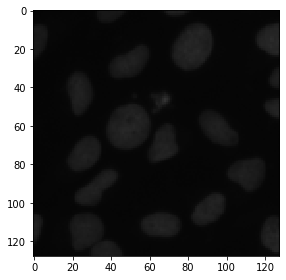

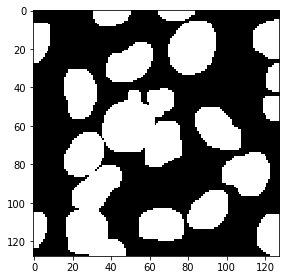

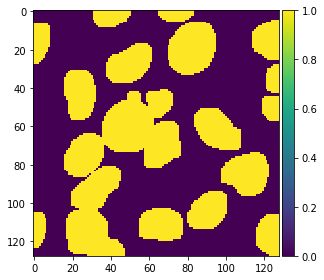

In [63]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


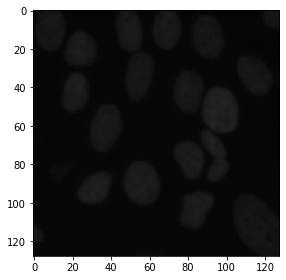

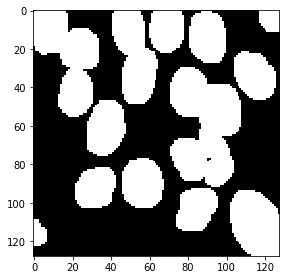

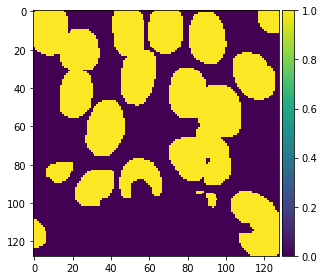

In [64]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()



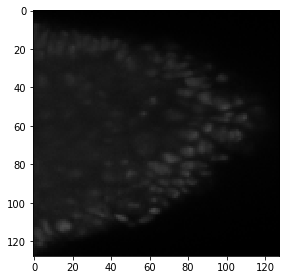

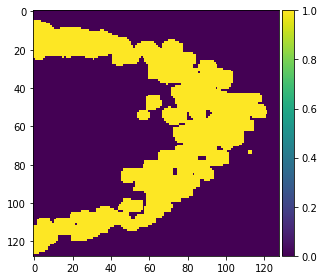

In [70]:
# testing 
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix])
plt.show()

imshow(np.squeeze(preds_test_t[ix]))
plt.show()



In [71]:
!tensorboard --logdir=logs/ --port=8080

/bin/bash: /home/prikshit/miniconda3/envs/gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-08-02 13:26:14.629048: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-02 13:26:15.525913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 13:26:15.530386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 13:26:15.530477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value 